In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix


### Planning

In [2]:
from pydataset import data

In [4]:
# working on the iris dataset

- petal legnth
- petal width
- sepal legnth
- sepal width
- species

Problem statement: can i reliably use the other four present feilds to reliably predict which species of iris flower i have present

X : potentially: detal legnth, pedal width, sepal legnth, sepal width

Y : species, a label ( which means a machine learning problem, specifically the classification type of problem)

### Acquisitiom



In [6]:
iris = data('iris')
iris

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa
7,4.6,3.4,1.4,0.3,setosa
8,5.0,3.4,1.5,0.2,setosa
9,4.4,2.9,1.4,0.2,setosa
10,4.9,3.1,1.5,0.1,setosa


### Preparation


In [7]:
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [9]:
iris.columns = [col.lower().replace('.','_') for col in iris.columns]
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [10]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa
7,4.6,3.4,1.4,0.3,setosa
8,5.0,3.4,1.5,0.2,setosa
9,4.4,2.9,1.4,0.2,setosa
10,4.9,3.1,1.5,0.1,setosa


### Exploration

petal more valuable than sepal

In [11]:
train_val, test = train_test_split(iris, train_size=0.8, random_state=1349, stratify=iris['species'])

train, validate = train_test_split(train_val, train_size=0.7, random_state=1349, stratify=train_val['species'])

In [12]:
train.shape, validate.shape, test.shape

((84, 5), (36, 5), (30, 5))

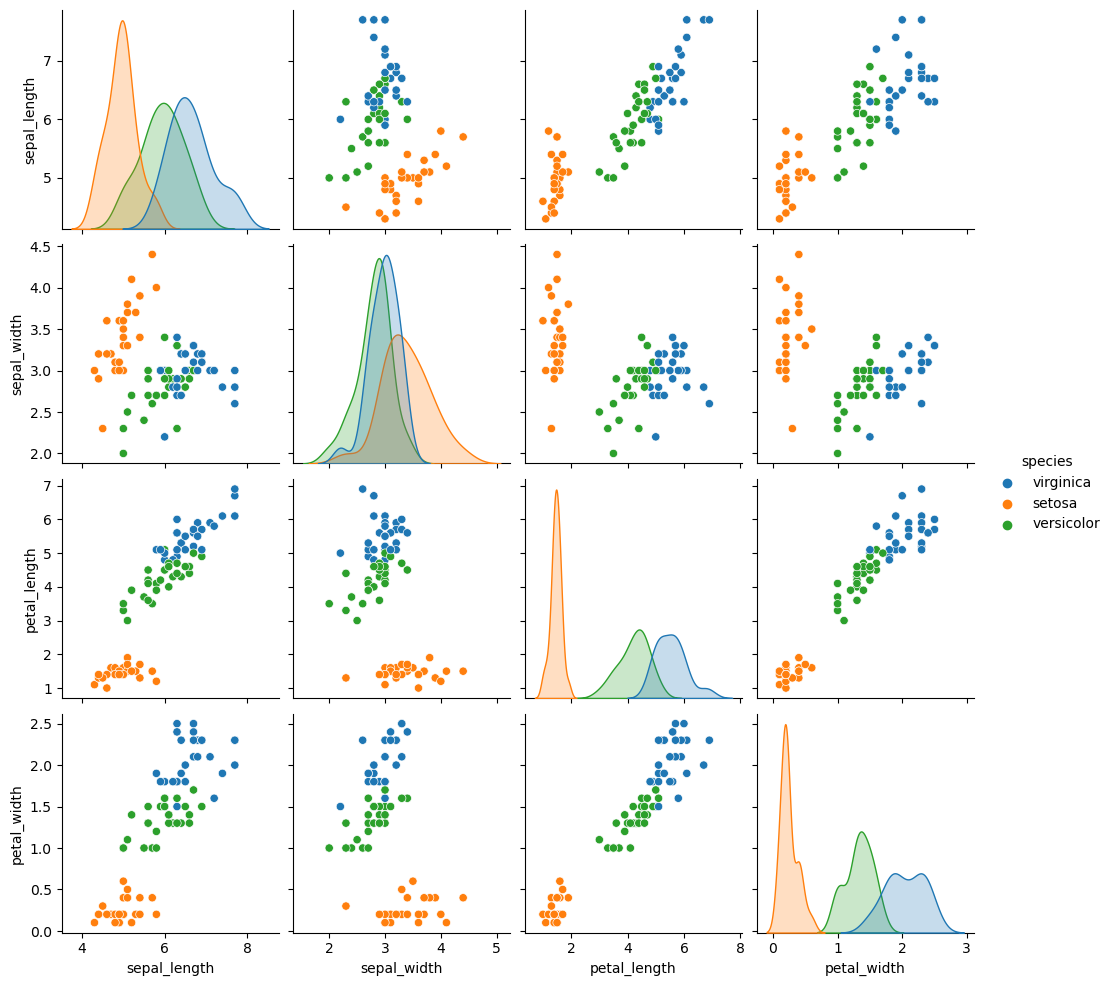

In [13]:
sns.pairplot(train, hue='species')

In [14]:
# takeaways = (order of importance) petal width, 
# pedal legnth, sepal legth, sepal width

### Modeling

In [20]:
X_cols = train.columns.to_list()
y_cols = 'species'

In [ ]:
# drop species out of xcols

In [21]:
X_cols.remove('species')

In [22]:
train[X_cols]

,sepal_length,sepal_width,petal_length,petal_width
139,6.0,3.0,4.8,1.8
8,5.0,3.4,1.5,0.2
80,5.7,2.6,3.5,1.0
75,6.4,2.9,4.3,1.3
98,6.2,2.9,4.3,1.3
95,5.6,2.7,4.2,1.3
84,6.0,2.7,5.1,1.6
14,4.3,3.0,1.1,0.1
86,6.0,3.4,4.5,1.6
43,4.4,3.2,1.3,0.2


In [19]:
train[y_cols]

139     virginica
8          setosa
80     versicolor
75     versicolor
98     versicolor
95     versicolor
84     versicolor
14         setosa
86     versicolor
43         setosa
17         setosa
26         setosa
104     virginica
23         setosa
136     virginica
144     virginica
68     versicolor
103     virginica
67     versicolor
62     versicolor
45         setosa
82     versicolor
30         setosa
120     virginica
94     versicolor
44         setosa
131     virginica
10         setosa
130     virginica
38         setosa
76     versicolor
124     virginica
31         setosa
27         setosa
102     virginica
50         setosa
101     virginica
72     versicolor
89     versicolor
125     virginica
61     versicolor
121     virginica
88     versicolor
15         setosa
141     virginica
145     virginica
49         setosa
150     virginica
127     virginica
146     virginica
57     versicolor
35         setosa
22         setosa
5          setosa
116     virginica
83     ver

Make
fit
use model

In [24]:
# make

clf = DecisionTreeClassifier()
clf

DecisionTreeClassifier()

In [27]:
# not assigning clf.fit into anything, it changes 
# the object itself, which means its readu to use
clf.fit(train[X_cols], train[y_cols])

DecisionTreeClassifier()

In [32]:
model_1_preds = clf.predict(train[X_cols])
model_1_preds

array(['virginica', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'setosa', 'versicolor', 'setosa',
       'setosa', 'setosa', 'virginica', 'setosa', 'virginica',
       'virginica', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'setosa', 'virginica', 'versicolor',
       'setosa', 'virginica', 'setosa', 'virginica', 'setosa',
       'versicolor', 'virginica', 'setosa', 'setosa', 'virginica',
       'setosa', 'virginica', 'versicolor', 'versicolor', 'virginica',
       'versicolor', 'virginica', 'versicolor', 'setosa', 'virginica',
       'virginica', 'setosa', 'virginica', 'virginica', 'virginica',
       'versicolor', 'setosa', 'setosa', 'setosa', 'virginica',
       'versicolor', 'versicolor', 'setosa', 'versicolor', 'versicolor',
       'setosa', 'virginica', 'versicolor', 'virginica', 'setosa',
       'virginica', 'virginica', 'setosa', 'virginica', 'setosa',
       'versicolor', 'versicolor', 'setosa

In [37]:
clf.score(train[X_cols],train[y_cols])

1.0

In [ ]:
# lets make a second model

In [33]:
# make
clf1 = DecisionTreeClassifier(max_depth=2)
# fit
clf1.fit(train[X_cols], train[y_cols])
# use
model_2_preds = clf1.predict(train[X_cols])
model_2_preds

array(['virginica', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'virginica', 'setosa', 'versicolor', 'setosa',
       'setosa', 'setosa', 'virginica', 'setosa', 'virginica',
       'virginica', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'setosa', 'virginica', 'versicolor',
       'setosa', 'virginica', 'setosa', 'virginica', 'setosa',
       'versicolor', 'virginica', 'setosa', 'setosa', 'virginica',
       'setosa', 'virginica', 'versicolor', 'versicolor', 'virginica',
       'versicolor', 'virginica', 'versicolor', 'setosa', 'virginica',
       'virginica', 'setosa', 'virginica', 'virginica', 'virginica',
       'versicolor', 'setosa', 'setosa', 'setosa', 'virginica',
       'versicolor', 'virginica', 'setosa', 'versicolor', 'virginica',
       'setosa', 'virginica', 'versicolor', 'virginica', 'setosa',
       'virginica', 'virginica', 'setosa', 'virginica', 'setosa',
       'versicolor', 'versicolor', 'setosa', 

In [34]:
clf1.score(train[X_cols],train[y_cols])

0.9642857142857143

In [35]:
clf2 = DecisionTreeClassifier(max_depth=1)
clf2.fit(train[X_cols], train[y_cols])
model_3_preds = clf2.predict(train[X_cols])
model_3_preds

array(['versicolor', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'setosa', 'versicolor', 'setosa',
       'setosa', 'setosa', 'versicolor', 'setosa', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'setosa', 'versicolor', 'setosa', 'versicolor',
       'versicolor', 'setosa', 'versicolor', 'setosa', 'versicolor',
       'setosa', 'versicolor', 'versicolor', 'setosa', 'setosa',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor', 'setosa',
       'versicolor', 'versicolor', 'setosa', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'setosa', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'versicolor', 'setosa', 'versicolor',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'versicolor', 'setosa', 'versicolor',
       'setosa', 'versicolor

In [36]:
clf2.score(train[X_cols],train[y_cols])

0.6666666666666666

In [38]:
accuracy_score(train[y_cols], model_3_preds)

0.6666666666666666

In [39]:
print(export_text(clf, feature_names=X_cols))

|--- petal_width <= 0.80
|   |--- class: setosa
|--- petal_width >  0.80
|   |--- petal_length <= 4.75
|   |   |--- class: versicolor
|   |--- petal_length >  4.75
|   |   |--- petal_width <= 1.75
|   |   |   |--- petal_length <= 4.95
|   |   |   |   |--- class: versicolor
|   |   |   |--- petal_length >  4.95
|   |   |   |   |--- petal_width <= 1.55
|   |   |   |   |   |--- class: virginica
|   |   |   |   |--- petal_width >  1.55
|   |   |   |   |   |--- sepal_length <= 6.95
|   |   |   |   |   |   |--- class: versicolor
|   |   |   |   |   |--- sepal_length >  6.95
|   |   |   |   |   |   |--- class: virginica
|   |   |--- petal_width >  1.75
|   |   |   |--- class: virginica



In [ ]:
plot_tree(clf,f)

In [42]:
print(export_text(clf1, feature_names=X_cols))

|--- petal_length <= 2.45
|   |--- class: setosa
|--- petal_length >  2.45
|   |--- petal_length <= 4.75
|   |   |--- class: versicolor
|   |--- petal_length >  4.75
|   |   |--- class: virginica



In [45]:
print(classification_report(train[y_cols], model_2_preds))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        28
  versicolor       1.00      0.89      0.94        28
   virginica       0.90      1.00      0.95        28

    accuracy                           0.96        84
   macro avg       0.97      0.96      0.96        84
weighted avg       0.97      0.96      0.96        84



# Random Forest

In [46]:
X_train =train[X_cols]
y_train =train[y_cols]

In [47]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
rf = RandomForestClassifier()

In [53]:
rf.fit(X_train[['petal_length','petal_width']], y_train)
rf1_preds= rf.predict(X_train[['petal_length','petal_width']])

In [54]:
rf1_preds

array(['virginica', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'setosa', 'versicolor', 'setosa',
       'setosa', 'setosa', 'virginica', 'setosa', 'virginica',
       'virginica', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'setosa', 'virginica', 'versicolor',
       'setosa', 'virginica', 'setosa', 'virginica', 'setosa',
       'versicolor', 'virginica', 'setosa', 'setosa', 'virginica',
       'setosa', 'virginica', 'versicolor', 'versicolor', 'virginica',
       'versicolor', 'virginica', 'versicolor', 'setosa', 'virginica',
       'virginica', 'setosa', 'virginica', 'virginica', 'virginica',
       'versicolor', 'setosa', 'setosa', 'setosa', 'virginica',
       'versicolor', 'versicolor', 'setosa', 'versicolor', 'versicolor',
       'setosa', 'virginica', 'versicolor', 'virginica', 'setosa',
       'virginica', 'virginica', 'setosa', 'virginica', 'setosa',
       'versicolor', 'versicolor', 'setosa

In [ ]:
# model assessment and predictions

In [60]:
# what do the models do on validate
X_val, y_val = validate[X_cols], validate[y_cols]
#validate accuracy
clf2.score(X_val, y_val)

0.6666666666666666

In [61]:
# train accuracy
clf2.score(X_train, y_train)


0.6666666666666666

In [ ]:
#train






In [64]:
val_pred = rf.predict(X_val[rf_feats])

NameError: name 'rf_feats' is not defined

In [65]:
classification_report(y_val, val_pred, output_dict=True)

NameError: name 'val_pred' is not defined

decision tree model number 2 had a high level of consistancy between accuracy on train and validate
- the other two most performing models had 100 accuracy on train, which almost certaintly means they were overfit
- because of this model #2 appears to be our best performer
- lets see how it does on the test 

In [ ]:
#val

In [ ]:
#test

In [67]:
clf1.score(test[X_cols], test[y_cols])

0.9333333333333333